In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=20a691d0b5f3a6146d8439bdef6b86440dee0cf2e6b38e78c1d786dba4d2c744
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
import pandas as pd

file_path = '/content/Climate.csv'
climate_data = pd.read_csv(file_path)

climate_data.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
climate_data['date'] = pd.to_datetime(climate_data['date'])

missing_values = climate_data.isnull().sum()

missing_values

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [ ]:
descriptive_stats = climate_data.describe()

descriptive_stats

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
from sklearn.preprocessing import StandardScaler

climate_data.set_index('date', inplace=True)

numerical_columns = climate_data.columns

scaler = StandardScaler()
climate_data_standardized = scaler.fit_transform(climate_data[numerical_columns])
climate_data_standardized = pd.DataFrame(climate_data_standardized, columns=numerical_columns, index=climate_data.index)

climate_data_standardized.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321
2013-01-02,-2.463454,1.862828,-0.838196,0.037162
2013-01-03,-2.495219,1.564569,-0.475626,0.041972
2013-01-04,-2.291015,0.630022,-1.221233,0.033647
2013-01-05,-2.654044,1.554627,-0.680303,0.029946


In [ ]:
from pyod.models.iforest import IForest

isolation_forest = IForest(n_estimators=100, max_samples='auto', contamination=0.1)
isolation_forest.fit(climate_data_standardized)

anomalies = isolation_forest.predict(climate_data_standardized)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


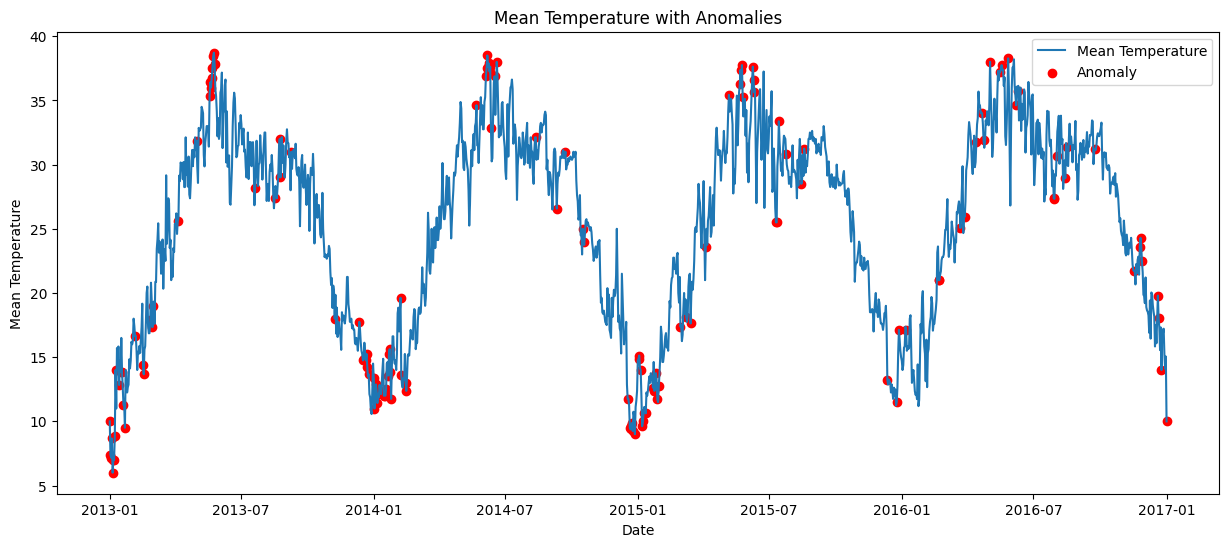

In [ ]:
import matplotlib.pyplot as plt

climate_data['anomaly'] = anomalies  # Adding the anomalies to the original dataset

# Plotting the data with anomalies
plt.figure(figsize=(15, 6))
plt.plot(climate_data.index, climate_data['meantemp'], label='Mean Temperature')
plt.scatter(climate_data[climate_data['anomaly'] == 1].index,
            climate_data[climate_data['anomaly'] == 1]['meantemp'],
            color='red', label='Anomaly')
plt.title("Mean Temperature with Anomalies")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()